## Explore the Datasets

In [1]:
import pandas as pd

In [ ]:
names = pd.read_csv('../data/name.basics.tsv', sep="\t")

In [42]:
titles = pd.read_csv('../data/title.basics.tsv', sep="\t")

In [4]:
crew = pd.read_csv('../data/title.crew.tsv', sep="\t")

In [5]:
principals = pd.read_csv('../data/title.principals.tsv', sep="\t")

In [6]:
ratings = pd.read_csv('../data/title.ratings.tsv', sep='\t')

In [21]:
def explore_datasets(list_of_dfs):
    for df in list_of_dfs:
        print('Shape: ', df.shape, end='\n\n')
        print('Columns: ', df.columns.to_list(), end='\n\n')
        print('Data Types: ', df.dtypes, end='\n\n')
        print('Missing Values: ', df.isnull().sum().sum(), end='\n\n')
        print('Firs row: \n', df.head(1))
        print('-----------------------------------')

In [ ]:
explore_datasets([names, titles, crew, principals, ratings])

Shape:  (14907745, 6)

Columns:  ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles']

Data Types:  nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object

Missing Values:  10

Firs row: 
       nconst   primaryName birthYear deathYear             primaryProfession  \
0  nm0000001  Fred Astaire      1899      1987  actor,miscellaneous,producer   

                            knownForTitles  
0  tt0072308,tt0050419,tt0027125,tt0025164  
-----------------------------------
Shape:  (12101466, 9)

Columns:  ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']

Data Types:  tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes   

In [43]:
names['birthYear'] = pd.to_numeric(names['birthYear'], errors='coerce')
names['deathYear'] = pd.to_numeric(names['deathYear'], errors='coerce')
titles['startYear'] = pd.to_numeric(titles['startYear'], errors='coerce')
titles['endYear'] = pd.to_numeric(titles['endYear'], errors='coerce')

In [44]:
movies = titles[titles['titleType'] == 'movie']

In [47]:
movies = movies.merge(ratings, on='tconst', how='inner')

In [ ]:
movies.drop(['tconst', 'titleType', 'originalTitle', 'startYear', 'endYear'], axis=1, inplace=True)

In [ ]:
movies.fillna('Unknown')
movies = movies[movies['averageRating'] != '\\N']
movies = movies[movies['isAdult'] != '\\N']
movies = movies[movies['runtimeMinutes'] != '\\N']
movies = movies[movies['genres'] != '\\N']

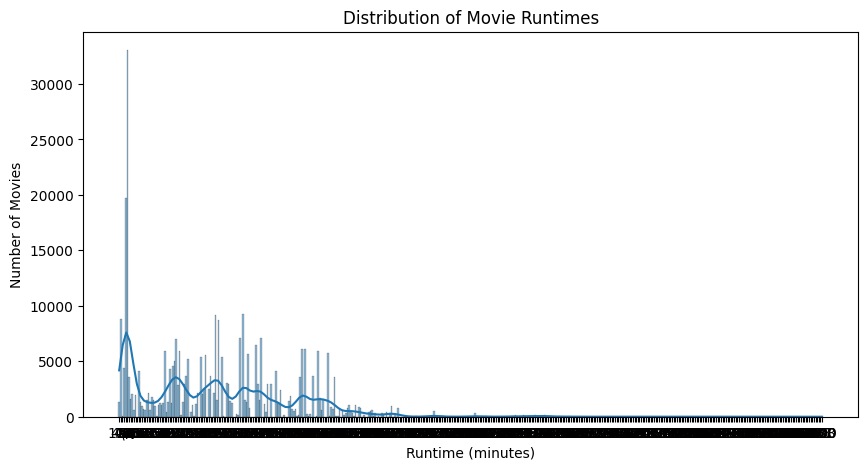

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume movies['runtimeMinutes'] is already numeric and cleaned
plt.figure(figsize=(10,5))
sns.histplot(movies['runtimeMinutes'], bins=50, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
movies['runtimeMinutes_scaled'] = scaler.fit_transform(movies[['runtimeMinutes']])

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer

movies['genres'] = movies['genres'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genres'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=movies.index)

In [82]:
X = pd.concat([movies[['runtimeMinutes_scaled', 'isAdult']], genre_df], axis=1)
y = movies['averageRating']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.3f}')

Mean Squared Error: 1.480


In [89]:
directors = principals[principals['category'] == 'director']
unique = directors['nconst'].nunique()
unique

801505

In [92]:
directors.head()

,tconst,ordering,nconst,category,job,characters
1,tt0000001,2,nm0005690,director,\N,\N
4,tt0000002,1,nm0721526,director,\N,\N
6,tt0000003,1,nm0721526,director,\N,\N
12,tt0000004,1,nm0721526,director,\N,\N
19,tt0000007,3,nm0005690,director,\N,\N


In [90]:
# Count how many movies each director has
director_counts = directors['nconst'].value_counts().reset_index()
director_counts.columns = ['nconst', 'movie_count']

# Top 100 directors
top_100_directors = director_counts.head(100)

In [91]:
top_100_directors

,nconst,movie_count
0,nm1203430,13159
1,nm8467983,13074
2,nm1966600,10938
3,nm1409127,10353
4,nm5262331,8287
...,...,...
95,nm12930298,3639
96,nm6307282,3628
97,nm0721405,3621
98,nm11227024,3607


## Later Maybe

(1740.0, 2025.0)

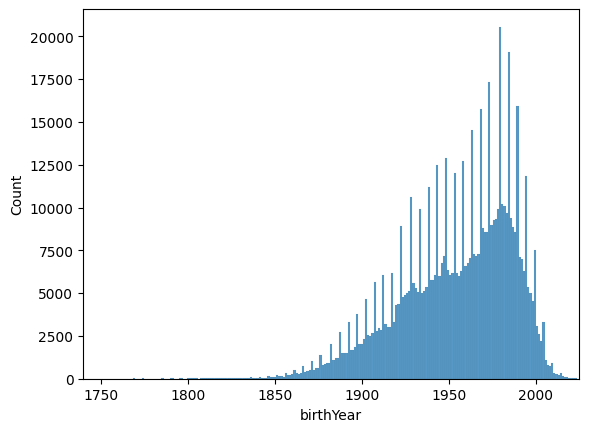

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(names, x='birthYear')
plt.xlim(1740, 2025)

/var/folders/zd/yc8nts_x4r3c0swf74xpf6600000gn/T/ipykernel_8383/2166098233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_type_counts.index, y=title_type_counts.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'tvEpisode'),
  Text(1, 0, 'short'),
  Text(2, 0, 'movie'),
  Text(3, 0, 'video'),
  Text(4, 0, 'tvSeries'),
  Text(5, 0, 'tvMovie'),
  Text(6, 0, 'tvMiniSeries'),
  Text(7, 0, 'tvSpecial'),
  Text(8, 0, 'videoGame'),
  Text(9, 0, 'tvShort'),
  Text(10, 0, 'tvPilot')])

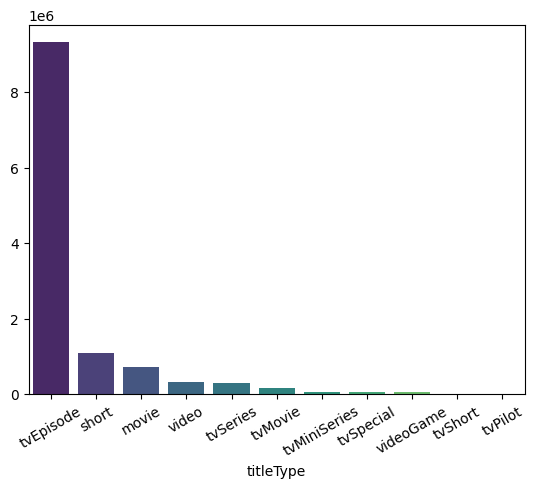

In [ ]:
title_type_counts = basics['titleType'].value_counts()
sns.barplot(x=title_type_counts.index, y=title_type_counts.values, palette='viridis')
plt.xticks(rotation=30)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892.0,NaN,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,Short


In [35]:
movies = basics[basics['titleType'] == 'movie']
movies.shape

(732928, 9)

In [ ]:
movies = movies.merge(ratings, on='tconst', how='inner')

In [ ]:
movies['runtimeMinutes'] = pd.to_numeric(movies['runtimeMinutes'], errors='coerce')
movies_corr = movies.dropna(subset=['runtimeMinutes', 'averageRating'])

In [44]:
movies_filtered = movies_corr[movies_corr['runtimeMinutes'] <= 400]
upper_limit = movies_corr['runtimeMinutes'].quantile(0.99)
movies_filtered = movies_corr[movies_corr['runtimeMinutes'] <= upper_limit]

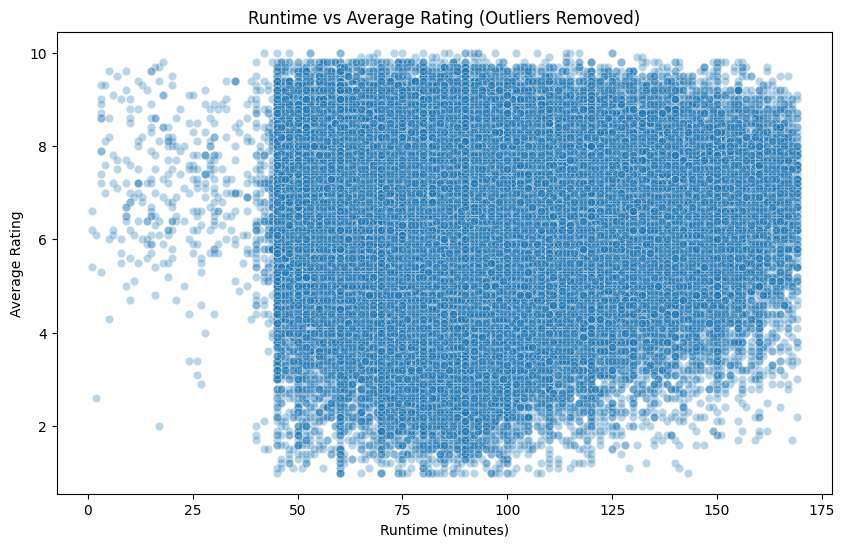

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=movies_filtered, x='runtimeMinutes', y='averageRating', alpha=0.3)
plt.title('Runtime vs Average Rating (Outliers Removed)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()